In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math

In [2]:
a=1
n=3000
b=100
x = a*np.random.normal(size=n)+b

In [3]:
print(np.mean(x))
print(np.var(x))
print(np.std(x))

99.99085862566129
0.9743506704681649
0.9870920273551828


In [4]:
def make_segments(X, N, NN=0):
    #Function to split a sequence of numbers (x) into
# N equal segments, with a spacing between them NN (>=0)
#Then the mean and variances of each segment are reported
# Inputs  x : time series data
#              N : length of segment the series x to be split into
#              NN : [Optional, default=0], space between the segments in
#              data points
#
#   Output:  Xm   : Sequence of means of each segment
#           Xvar : Sequence of variance values for for each segment

    M = len(X)
    n = int(np.floor(M / (N + NN)))
    y = np.zeros((N, n))
    for i in range(n):
        j = np.arange(N) + (N + NN) * i
        y[:, i] = X[j]
    Xm = np.mean(y)
    Xvar = np.var(y)
    Xstd = np.std(y)
    return Xm, Xvar,Xstd,y

In [5]:
Xm, Xvar,Xstd,y=make_segments(x,2)
print(Xm, Xvar,Xstd)

99.99085862566128 0.974350670468165 0.9870920273551829


In [6]:
print(np.mean(y))
print(np.var(y))
print(np.std(y))

99.99085862566128
0.974350670468165
0.9870920273551829


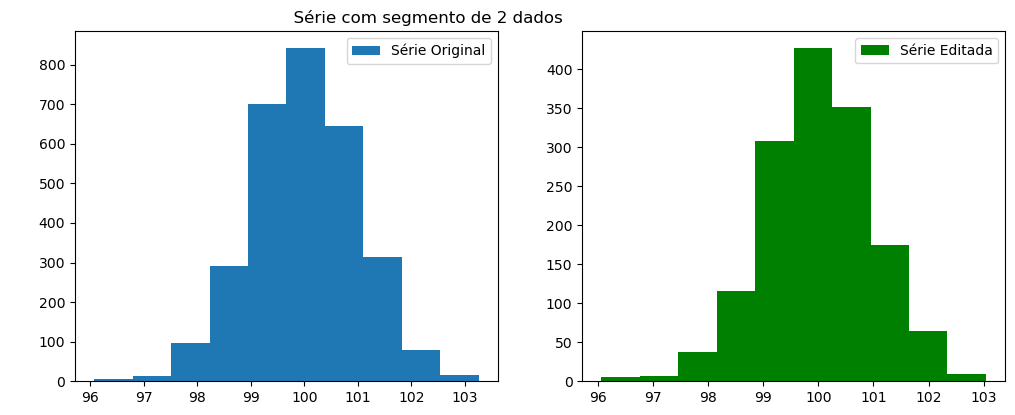

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('                                                      Série com segmento de 2 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()



99.99085862566129 0.9743506704681649 0.9870920273551828


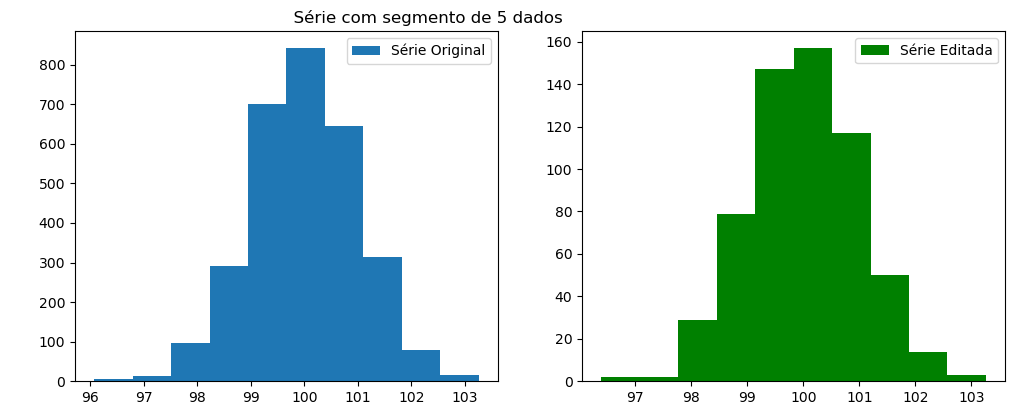

In [8]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('                                                      Série com segmento de 5 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


99.99085862566129 0.9743506704681649 0.9870920273551828


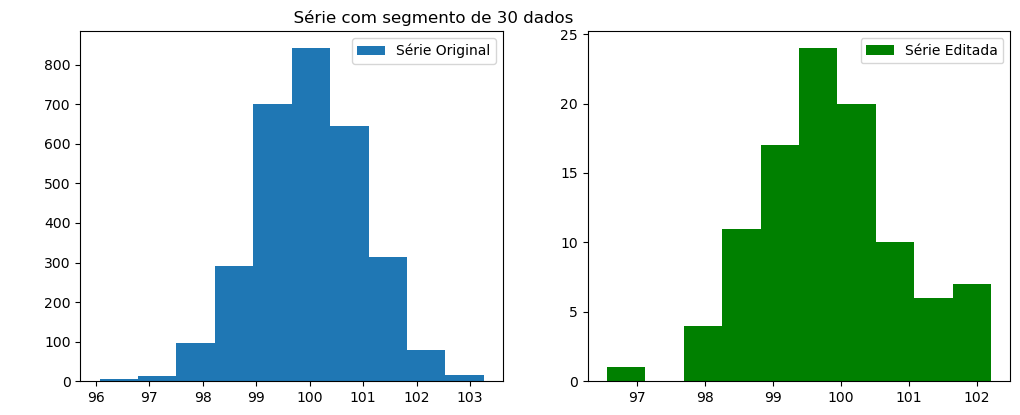

In [9]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221) 
plt.title('                                                      Série com segmento de 30 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.50027118584048 0.08447554940194393 0.2906467777250316


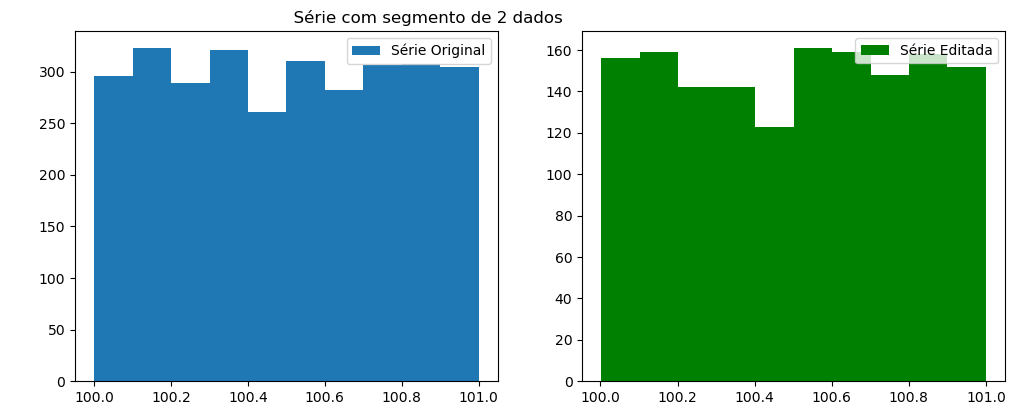

In [10]:
a=1
n=3000
b=100
x = a*np.random.sample(size=n)+b

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.title('                                                      Série com segmento de 2 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.50027118584048 0.08447554940194393 0.2906467777250316


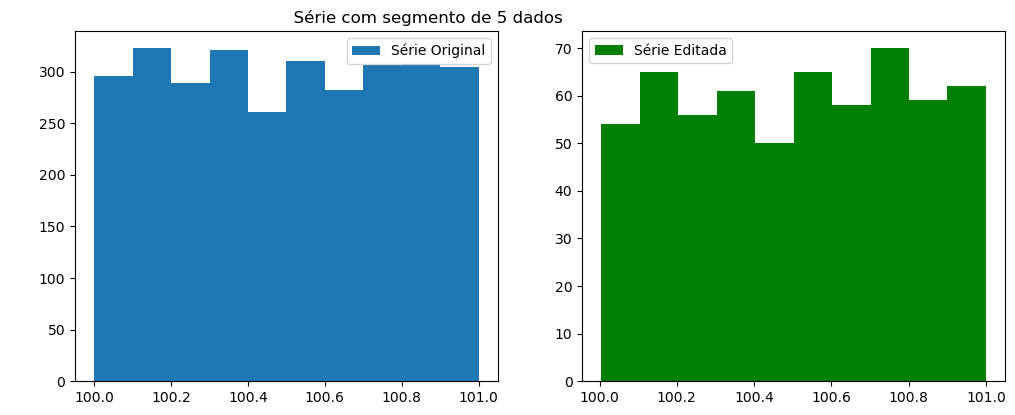

In [11]:

Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('                                                      Série com segmento de 5 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

100.50027118584048 0.08447554940194393 0.2906467777250316


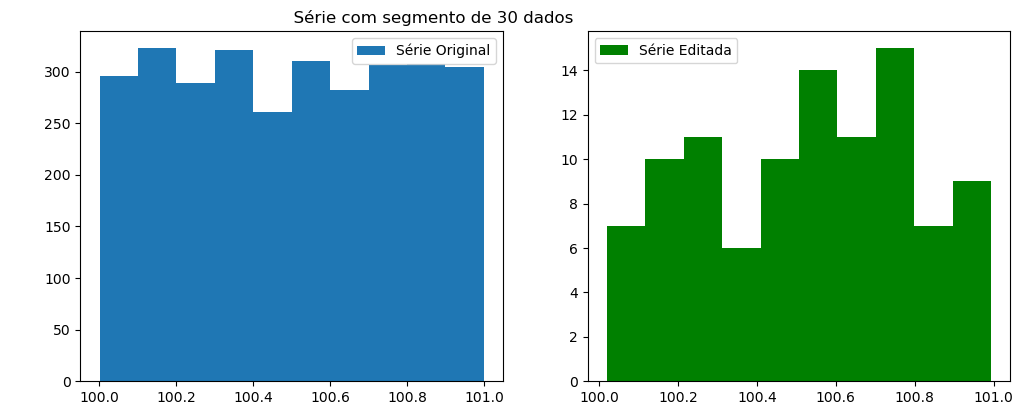

In [12]:

Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.title('                                                      Série com segmento de 30 dados')

plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

0.3165793014502432 0.0658648890737045 0.25664155757340723


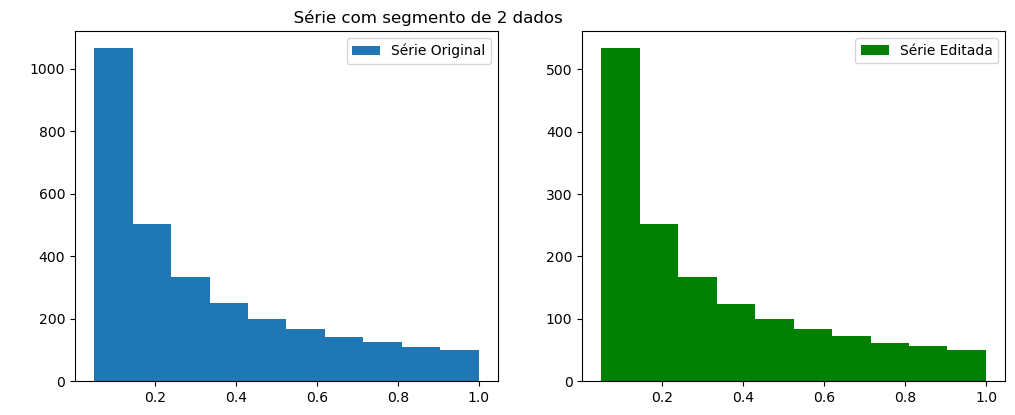

In [13]:
a=1
n=3000
b=100
x = np.exp(-np.arange(1, n+1)/1000)

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.title('                                                      Série com segmento de 2 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


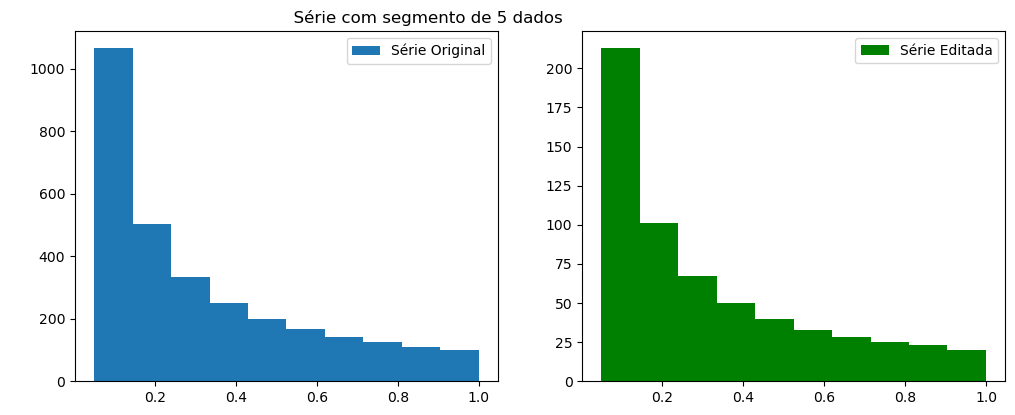

In [14]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('                                                      Série com segmento de 5 dados')

plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


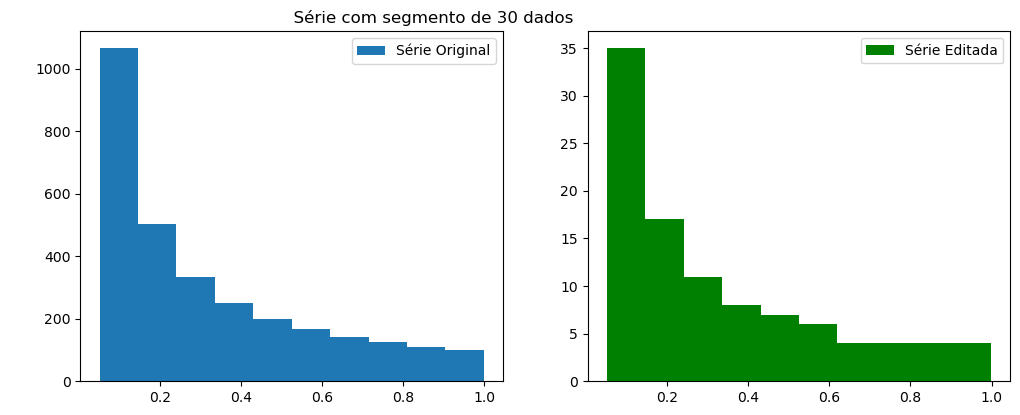

In [15]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.title('                                                      Série com segmento de 30 dados')

plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


In [149]:

def wildpoint(Xo, Const=2):
    Xstd = np.std(Xo)
    n = len(Xo)
    Xor = Xo.copy()
    # Primeira etapa    
    I1 = np.arange(2, n-2)
    il1 = len(I1)
    xso1 = np.column_stack((I1-2*np.ones(il1), I1-np.ones(il1), I1, I1+np.ones(il1), I1+2*np.ones(il1)))
    xx1 = np.sort(Xo)
    Xo[I1] = xx1
    # Segunda etapa    
    I2 = np.arange(3, n-3)
    il2 = len(I2)
    xso2 = np.column_stack((I2-np.ones(il2), I2, I2+np.ones(il2)+1))
    xx2 = np.sort(Xo)
    Xo[I2] = xx2
    # Comparar a série temporal original com a ordenada    
    Diferen = np.abs(Xo - Xor)
    III = np.where(Diferen > Const*Xstd)[0]
    X = Xor.copy()
    X[III] = Xo[III]
    return X


In [123]:
dados = sc.loadmat('SST.mat')
sst = dados['sst']
ssti = sst[0,0:2000]
plt.style.use('ggplot')
time= np.linspace(start=0,stop=len(ssti),num=len(ssti))
sstii = pd.Series(ssti).interpolate().values

In [155]:
Sp= pd.Series(sstii)
wpd = sc.loadmat('wp.mat')
wp = wpd['wp']


In [152]:
plt.figure(figsize=(12,10))
plt.plot(wp[0,:],'r-' ,label='Série original')
plt.plot(ssti,'b-' ,label='Série original')

plt.legend()


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1200x1000 with 0 Axes>

In [20]:

Xm, Xvar,Xstd,y=make_segments(meio2,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(meio2, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='serie segmentada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

NameError: name 'meio2' is not defined

In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
kpss_test(meio2)

Results of KPSS Test:
Test Statistic            0.09051
p-value                   0.10000
Lags Used                27.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/home/aluno001/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
